In [114]:
# Import data from csv, data analysis & cleaning (replace missing values, drop duplicates) using
# Data Science Salaries from Kaggle .com

In [115]:
# Import .csv file into a Pandas Dataframe

import pandas as pd
import numpy as np


In [116]:
# data source = Kaggle.com (https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?resource=download)

df_sal = pd.read_csv('ds_salaries.csv')

In [117]:
# view what the data frame looks like - columns and beginning / ending data, confirm no missing data and check data format types

df_sal.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [118]:
df_sal.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [119]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [120]:
# the index column is repeated in the first (unnamed) column, so using drop based on index to remove the duplicate column
# creating df2 to retain original format of data

df_sal2 = df_sal.drop(df_sal.columns[0], axis=1)

In [121]:
df_sal2

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [122]:
# import amended file above to replace missing values

df_sal3 = pd.read_csv('ds_salaries_missing.csv')

In [123]:
df_sal3.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020.0,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020.0,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020.0,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020.0,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020.0,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [124]:
# shows missing data in column work_year - only 591 count, should be 607 (work_year has also been changed from integer to
# float during the process of creating missing data - will be ignored as the data frame is only being used to demonstrate
# data cleaning to replace missing data)

df_sal3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          607 non-null    int64  
 1   work_year           591 non-null    float64
 2   experience_level    607 non-null    object 
 3   employment_type     607 non-null    object 
 4   job_title           607 non-null    object 
 5   salary              607 non-null    int64  
 6   salary_currency     607 non-null    object 
 7   salary_in_usd       607 non-null    int64  
 8   employee_residence  607 non-null    object 
 9   remote_ratio        607 non-null    int64  
 10  company_location    607 non-null    object 
 11  company_size        607 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 57.0+ KB


In [125]:
df_sal3.isna().sum()

Unnamed: 0             0
work_year             16
experience_level       0
employment_type        0
job_title              0
salary                 0
salary_currency        0
salary_in_usd          0
employee_residence     0
remote_ratio           0
company_location       0
company_size           0
dtype: int64

In [126]:
# missing data is in the year column, for which same years are grouped together - use previous value to populate missing cells

df_sal_cleaned=df_sal3.fillna(method="ffill")

In [127]:
# rechecking, no more missing data

df_sal_cleaned.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [128]:
# Import data via API, merge dataframe, iterator, dictionaries/lists) and 
# visualization using stock data for Visa vs a benchmark (S&P 500 Index ETF)

In [129]:

# data set source = https://www.alphavantage.co/documentation/ with ticker symbol V selected for VISA
# a stock for which I will compare performance against a general market benchmark (S&P 500 Index ETF)

import requests

dataV = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=V&apikey=NLZ2TGZGULE9VS10")

In [130]:
dataV = dataV.json()

In [131]:
dataV

{'Meta Data': {'1. Information': 'Monthly Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'V',
  '3. Last Refreshed': '2022-09-13 16:00:01',
  '4. Time Zone': 'US/Eastern'},
 'Monthly Time Series': {'2022-09-13': {'1. open': '198.7200',
   '2. high': '207.1900',
   '3. low': '196.4000',
   '4. close': '199.6700',
   '5. volume': '36959229'},
  '2022-08-31': {'1. open': '208.4500',
   '2. high': '217.6100',
   '3. low': '198.6400',
   '4. close': '198.7100',
   '5. volume': '130178837'},
  '2022-07-29': {'1. open': '196.7900',
   '2. high': '218.0700',
   '3. low': '194.1400',
   '4. close': '212.1100',
   '5. volume': '118596952'},
  '2022-06-30': {'1. open': '212.0500',
   '2. high': '217.5800',
   '3. low': '185.9100',
   '4. close': '196.8900',
   '5. volume': '128123527'},
  '2022-05-31': {'1. open': '211.7700',
   '2. high': '214.8000',
   '3. low': '189.9500',
   '4. close': '212.1700',
   '5. volume': '171858850'},
  '2022-04-29': {'1. open': '223.0800',
   '2. high

In [132]:
dataV['Monthly Time Series']

{'2022-09-13': {'1. open': '198.7200',
  '2. high': '207.1900',
  '3. low': '196.4000',
  '4. close': '199.6700',
  '5. volume': '36959229'},
 '2022-08-31': {'1. open': '208.4500',
  '2. high': '217.6100',
  '3. low': '198.6400',
  '4. close': '198.7100',
  '5. volume': '130178837'},
 '2022-07-29': {'1. open': '196.7900',
  '2. high': '218.0700',
  '3. low': '194.1400',
  '4. close': '212.1100',
  '5. volume': '118596952'},
 '2022-06-30': {'1. open': '212.0500',
  '2. high': '217.5800',
  '3. low': '185.9100',
  '4. close': '196.8900',
  '5. volume': '128123527'},
 '2022-05-31': {'1. open': '211.7700',
  '2. high': '214.8000',
  '3. low': '189.9500',
  '4. close': '212.1700',
  '5. volume': '171858850'},
 '2022-04-29': {'1. open': '223.0800',
  '2. high': '229.2400',
  '3. low': '201.1000',
  '4. close': '213.1300',
  '5. volume': '151474586'},
 '2022-03-31': {'1. open': '214.4800',
  '2. high': '228.8100',
  '3. low': '186.6700',
  '4. close': '221.7700',
  '5. volume': '188732371'},


In [133]:
mts_visa = dataV['Meta Data']['2. Symbol']

In [134]:
mts_visa

'V'

In [135]:
import pandas as pd
from datetime import datetime

stock_nameV=[]
date_stampV=[]
close_priceV=[]

for x,y in dataV['Monthly Time Series'].items():
    stock_nameV.append(mts_visa)
    date_stampV.append(datetime.strptime(x, '%Y-%m-%d'))
    close_priceV.append(float(y['4. close']))

In [136]:
dataV_pd = {"date_stamp": date_stampV, "ticker": stock_nameV, "close_price": close_priceV}

In [137]:
df_mtsV=pd.DataFrame(dataV_pd)

In [138]:
df_mtsV

,date_stamp,ticker,close_price
0,2022-09-13,V,199.67
1,2022-08-31,V,198.71
2,2022-07-29,V,212.11
3,2022-06-30,V,196.89
4,2022-05-31,V,212.17
...,...,...,...
169,2008-08-29,V,75.90
170,2008-07-31,V,73.06
171,2008-06-30,V,81.31
172,2008-05-30,V,86.36


In [139]:
# data set source = https://www.alphavantage.co/documentation/ with ticker symbol IVV selected for S&P Index 500 Index ETF
# as a benchmark for the general market
dataIVV = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=IVV&apikey=NLZ2TGZGULE9VS10")

In [140]:
dataIVV = dataIVV.json()

In [141]:
dataIVV

{'Meta Data': {'1. Information': 'Monthly Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'IVV',
  '3. Last Refreshed': '2022-09-13 16:00:01',
  '4. Time Zone': 'US/Eastern'},
 'Monthly Time Series': {'2022-09-13': {'1. open': '394.9000',
   '2. high': '413.9400',
   '3. low': '390.4500',
   '4. close': '395.1400',
   '5. volume': '35089674'},
  '2022-08-31': {'1. open': '411.3400',
   '2. high': '434.0299',
   '3. low': '397.0900',
   '4. close': '397.1800',
   '5. volume': '93399466'},
  '2022-07-29': {'1. open': '378.5200',
   '2. high': '415.2000',
   '3. low': '372.9700',
   '4. close': '414.2800',
   '5. volume': '95301237'},
  '2022-06-30': {'1. open': '416.9900',
   '2. high': '419.2900',
   '3. low': '364.0300',
   '4. close': '379.1500',
   '5. volume': '146298953'},
  '2022-05-31': {'1. open': '413.6200',
   '2. high': '431.5000',
   '3. low': '382.1700',
   '4. close': '414.8700',
   '5. volume': '148309359'},
  '2022-04-29': {'1. open': '455.2600',
   '2. high

In [142]:
dataIVV['Monthly Time Series']

{'2022-09-13': {'1. open': '394.9000',
  '2. high': '413.9400',
  '3. low': '390.4500',
  '4. close': '395.1400',
  '5. volume': '35089674'},
 '2022-08-31': {'1. open': '411.3400',
  '2. high': '434.0299',
  '3. low': '397.0900',
  '4. close': '397.1800',
  '5. volume': '93399466'},
 '2022-07-29': {'1. open': '378.5200',
  '2. high': '415.2000',
  '3. low': '372.9700',
  '4. close': '414.2800',
  '5. volume': '95301237'},
 '2022-06-30': {'1. open': '416.9900',
  '2. high': '419.2900',
  '3. low': '364.0300',
  '4. close': '379.1500',
  '5. volume': '146298953'},
 '2022-05-31': {'1. open': '413.6200',
  '2. high': '431.5000',
  '3. low': '382.1700',
  '4. close': '414.8700',
  '5. volume': '148309359'},
 '2022-04-29': {'1. open': '455.2600',
  '2. high': '459.7900',
  '3. low': '412.9800',
  '4. close': '413.5600',
  '5. volume': '120564640'},
 '2022-03-31': {'1. open': '437.0000',
  '2. high': '464.0500',
  '3. low': '416.9100',
  '4. close': '453.6900',
  '5. volume': '177475497'},
 '

In [143]:
mts_sp500etf = dataIVV['Meta Data']['2. Symbol']

In [144]:
mts_sp500etf

'IVV'

In [145]:
stock_nameIVV=[]
date_stampIVV=[]
close_priceIVV=[]

for x,y in dataIVV['Monthly Time Series'].items():
    stock_nameIVV.append(mts_sp500etf)
    date_stampIVV.append(datetime.strptime(x, '%Y-%m-%d'))
    close_priceIVV.append(float(y['4. close']))

In [146]:
dataIVV_pd = {"date_stamp": date_stampIVV,"ticker": stock_nameIVV, "close_price": close_priceIVV}

In [147]:
df_mtsIVV=pd.DataFrame(dataIVV_pd)

In [154]:
# remove rows from df_mtsIVV that for data prior to earliest date in df_mtsV for chart vizualization
#(both time series are same length)

df_mtsIVV.drop(df_mtsIVV.index[174:268],0,inplace=True)

C:\Users\Lisa Wagner\AppData\Local\Temp\ipykernel_18816\617008741.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_mtsIVV.drop(df_mtsIVV.index[174:268],0,inplace=True)


In [155]:
df_mtsIVV

,date_stamp,ticker,close_price
0,2022-09-13,IVV,395.14
1,2022-08-31,IVV,397.18
2,2022-07-29,IVV,414.28
3,2022-06-30,IVV,379.15
4,2022-05-31,IVV,414.87
...,...,...,...
169,2008-08-29,IVV,128.94
170,2008-07-31,IVV,127.05
171,2008-06-30,IVV,128.00
172,2008-05-30,IVV,140.39


In [149]:
# check dataframes have same columns

df_mtsV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_stamp   174 non-null    datetime64[ns]
 1   ticker       174 non-null    object        
 2   close_price  174 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.2+ KB


In [156]:
df_mtsIVV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_stamp   174 non-null    datetime64[ns]
 1   ticker       174 non-null    object        
 2   close_price  174 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.2+ KB


In [157]:
#merge data frame based on date so prices of each stock (including ticker symbol) is combined on same row based on date

pd.merge(df_mtsV,df_mtsIVV, on="date_stamp", how = "inner")

,date_stamp,ticker_x,close_price_x,ticker_y,close_price_y
0,2022-09-13,V,199.67,IVV,395.14
1,2022-08-31,V,198.71,IVV,397.18
2,2022-07-29,V,212.11,IVV,414.28
3,2022-06-30,V,196.89,IVV,379.15
4,2022-05-31,V,212.17,IVV,414.87
...,...,...,...,...,...
169,2008-08-29,V,75.90,IVV,128.94
170,2008-07-31,V,73.06,IVV,127.05
171,2008-06-30,V,81.31,IVV,128.00
172,2008-05-30,V,86.36,IVV,140.39


In [158]:
import matplotlib.pyplot as plt
import numpy as np

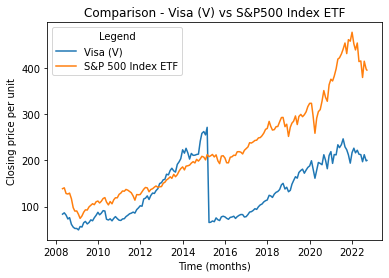

In [159]:
fig, ax = plt.subplots()

ax.plot(df_mtsV["date_stamp"],df_mtsV["close_price"], label = 'Visa (V)')
ax.plot(df_mtsIVV["date_stamp"],df_mtsIVV["close_price"], label = 'S&P 500 Index ETF')
ax.set_xlabel("Time (months)")
ax.set_ylabel("Closing price per unit")
ax.set_title("Comparison - Visa (V) vs S&P500 Index ETF")

ax.legend(title = 'Legend',loc = 'upper left')


plt.show()

In [ ]:
# the chart above appears to show Visa's price crashed around 2015.  Review of corporate actions shows a 4 for 1 Stock Split
# on March 2015.  In order for the chart to show the relationship between movement in the two prices accurately, Visa stock 
# prices will need to be restated to normalize the price across the whole time frame of the chart